## Feature Selecetion

Youtube Video Explanation:

- Forward Feature Selection :  https://youtu.be/pmZNQoUfp3Y
- Backward Feature Selection : https://youtu.be/2Y4PrhMyqX0
- Exhaustive Feature Selection : https://youtu.be/0ciQ-FzhrQw

**Wrapper Method**

- The main idea behind a wrapper method is to select which set of features works best for a machine learning model.
- It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation 
  criterion.
- The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For regression evaluation criterion can be MSE,MAE,MAPE,R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. It selects the combination of features that gives the optimal results for the specified machine learning algorithm.

**1. Forward Selection**

Forward selection is an iterative method in each iteration, we keep adding the feature which best improves our
model till an addition of a new variable does not improve the performance of the model.

**2. Backward Selection**

In backward elimination, we start with all the features and removes the least significant feature at each
iteration which improves the performance of the model. We repeat this until no improvement is observed on removal
of features.

**3. Exhaustive Feature Selection**

This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

## Forward Feature Selection

- In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models. 

- Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models. 

- Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a higest arruracy for classificartion and minimum MSE/MAPE/MAE for regression models of individual features.

### Forward Feature Selection for Classification Problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset #https://www.kaggle.com/burak3ergun/loan-data-set
df_loan = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Loan_Dataset/loan_data_set.csv")

In [3]:
#Load the dataset #https://www.kaggle.com/burak3ergun/loan-data-set
df_wine = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/wine_quality/winequality.csv")

In [4]:
df_loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
df_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red


In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Remove all null value
df_loan.dropna(inplace=True)
# drop the uninformatica column("Loan_ID")
df_loan.drop(labels=["Loan_ID"],axis=1,inplace=True)
df_loan.reset_index(drop=True,inplace=True)

In [8]:
#df_loan.info()

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df_loan.columns.tolist()
for column in cols:
    if df_loan[column].dtype == 'object':
        df_loan[column] = le.fit_transform(df_loan[column])

In [10]:
#df_wine.info()

In [11]:
#X = df_wine.iloc[:,0:-1]
#y = df_wine["color"]

In [76]:
X = df_loan.iloc[:,0:-1]
y = df_loan["Loan_Status"]

In [77]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [78]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(480, 11)
(480,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [79]:
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
# Lets use the built in function in Python
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [80]:
#from sklearn.datasets import load_iris

In [81]:
#iris = load_iris()
#X = iris.data
#y = iris.target

In [82]:
feature_names=tuple(X.columns)
feature_names

('Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area')

In [83]:
X.shape, y.shape

((480, 11), (480,))

In [84]:
sfs1 = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=1000),
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=0)

sfs1 = sfs1.fit(X, y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-06-18 20:44:26] Features: 1/11 -- score: 0.8083333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-06-18 20:44:26] Features: 2/11 -- score: 0.8104166666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2021-06-18 20:44:26] Features: 3/11 -- score: 0.8104166666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [85]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (9,),
  'cv_scores': array([0.80833333]),
  'avg_score': 0.8083333333333333,
  'feature_names': ('Credit_History',)},
 2: {'feature_idx': (6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('CoapplicantIncome', 'Credit_History')},
 3: {'feature_idx': (0, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender', 'CoapplicantIncome', 'Credit_History')},
 4: {'feature_idx': (0, 2, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender',
   'Dependents',
   'CoapplicantIncome',
   'Credit_History')},
 5: {'feature_idx': (0, 1, 2, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender',
   'Married',
   'Dependents',
   'CoapplicantIncome',
   'Credit_History')},
 6: {'feature_idx': (0, 1, 2, 4, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  '

In [86]:
sfs1.get_metric_dict()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (9,),
  'cv_scores': array([0.80833333]),
  'avg_score': 0.8083333333333333,
  'feature_names': ('Credit_History',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('CoapplicantIncome', 'Credit_History'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender', 'CoapplicantIncome', 'Credit_History'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 2, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  'feature_names': ('Gender',
   'Dependents',
   'CoapplicantIncome',
   'Credit_History'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 1, 2, 6, 9),
  'cv_scores': array([0.81041667]),
  'avg_score': 0.8104166666666667,
  

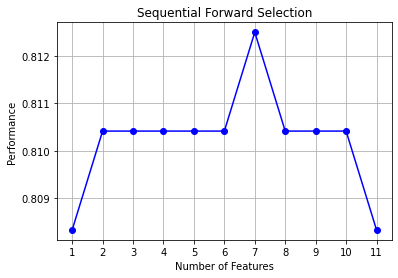

In [87]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [88]:
# Lets access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

(('Gender',
  'Married',
  'Dependents',
  'Self_Employed',
  'CoapplicantIncome',
  'LoanAmount',
  'Credit_History'),
 (0, 1, 2, 4, 6, 7, 9))

In [89]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(9,)",0.808333
2,"(6, 9)",0.810417
3,"(0, 6, 9)",0.810417
4,"(0, 2, 6, 9)",0.810417
5,"(0, 1, 2, 6, 9)",0.810417
6,"(0, 1, 2, 4, 6, 9)",0.810417
7,"(0, 1, 2, 4, 6, 7, 9)",0.8125
8,"(0, 1, 2, 4, 6, 7, 8, 9)",0.810417
9,"(0, 1, 2, 4, 6, 7, 8, 9, 10)",0.810417
10,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10)",0.810417


### Forward Feature Selection for Regression Problem

Selected Features : ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
Selected Features ID : (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


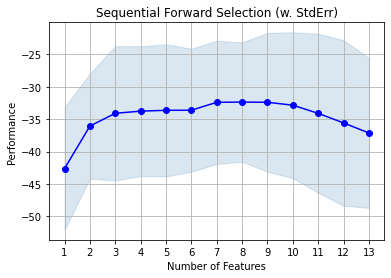

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
lr = LinearRegression()
sfs = SFS(lr, 
          k_features=13,#'best', 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)
sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
print("Selected Features :", sfs.k_feature_names_)
print("Selected Features ID :", sfs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [26]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(12,)",-42.618473
2,"(10, 12)",-36.06513
3,"(5, 10, 12)",-34.100081
4,"(3, 5, 10, 12)",-33.768085
5,"(0, 3, 5, 10, 12)",-33.639224
6,"(0, 3, 5, 7, 10, 12)",-33.627648
7,"(0, 2, 3, 5, 7, 10, 12)",-32.408158
8,"(0, 1, 2, 3, 5, 7, 10, 12)",-32.36972
9,"(0, 1, 2, 3, 5, 7, 10, 11, 12)",-32.401565
10,"(0, 1, 2, 3, 4, 5, 7, 10, 11, 12)",-32.850429


## Backward Feature Selection for Classification Problem

In short, the steps involved in backward elimination are as follows:

- Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
- Fit a full model including all the features.
- Consider the feature with the highest p-value. If the p-value > significance level then go to Step 4, otherwise terminate the process.
- Remove the feature which is under consideration.
- Fit a model without this feature. Repeat the entire process from Step 3.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#Load the dataset #https://www.kaggle.com/burak3ergun/loan-data-set
df_wine = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/wine_quality/winequality.csv")

In [29]:
X = df_wine.iloc[:,0:-1]
y = df_wine["color"]

In [30]:
feature_names = tuple(X.columns)
feature_names

('fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'good')

In [31]:
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
# Lets use the built in function in Python
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [32]:
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=4000),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=3)
sbs = sbs.fit(X, y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   34.1s finished

[2021-06-18 10:25:44] Features: 12/1 -- score: 0.9841460545330345[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   29.3s finished

[2021-06-18 10:26:13] Features: 11/1 -- score: 0.9841461256154851[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   20.5s finished

[2021-06-18 10:26:34] Features: 10/1 -- score: 0.9843000191211791[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [33]:
#print("Selected Features :", sbs.k_feature_names_)
sbs.k_feature_names_, sbs.k_feature_idx_

(('fixed acidity',
  'volatile acidity',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'),
 (0, 1, 3, 4, 5, 6, 7, 8, 9, 10))

In [34]:
#df.style.set_properties(**{'text-align': 'left'})
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]
#["feature_names"] = df["feature_names"].str.wrap(1000) #to set max line width of 100

In [35]:
df

,feature_idx,avg_score
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.983222
12,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.984146
11,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11)",0.984146
10,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10)",0.9843
9,"(0, 1, 3, 4, 5, 6, 8, 9, 10)",0.9843
8,"(0, 1, 3, 5, 6, 8, 9, 10)",0.983684
7,"(0, 1, 5, 6, 8, 9, 10)",0.982915
6,"(0, 1, 6, 8, 9, 10)",0.981376
5,"(0, 1, 6, 8, 9)",0.980298
4,"(0, 1, 6, 8)",0.974142


In [36]:
sbs.subsets_

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.97737765, 0.99261311, 0.97967667]),
  'avg_score': 0.9832224802515181,
  'feature_names': ('fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
   'quality',
   'good')},
 12: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.9787627 , 0.99261311, 0.98106236]),
  'avg_score': 0.9841460545330345,
  'feature_names': ('fixed acidity',
   'volatile acidity',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
   'quality',
   'good')},
 11: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.97830102, 0.99261311, 0.98152425]),
  'avg_score': 0.9841461256154851,
  'feature_names': ('fixed acidity',
   'volatile ac

Selected Features : ('fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
Selected Features ID : (0, 1, 3, 4, 5, 6, 7, 8, 9, 10)


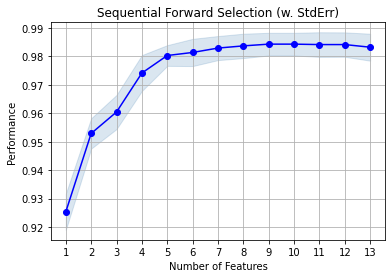

In [37]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
print("Selected Features :", sbs.k_feature_names_)
print("Selected Features ID :", sbs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

**Disadvantages of Forward and Backward Feature Selection**

1. Since we know that SFS adds features at each iteration, a problem can occur when we add up a feature that was useful in the beginning, but after adding more ones, is now non-useful. At this point, there’s no way to remove this kind of feature.
2. The same thing happens to SBS but in the reverse direction—this is because of the inability of SBS to see the usefulness of a feature after being removed from the feature set.
3. For above reasons, and for more generalization for SBS and SFS, there are two methods that can solve such an issue: 

    - Exhaustive Feature Selection
    - Recursive Feature Elimination

## Exhaustive Feature Selection

This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection

In [39]:
from sklearn.datasets import load_iris
iris_data = load_iris()
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris['target'] = pd.Series(iris_data.target)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
X = df_iris.iloc[:,0:-1]
y = df_iris["target"]

In [41]:
feature_names = tuple(X.columns)
feature_names

('sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)')

In [42]:
efs = ExhaustiveFeatureSelector(
           #knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=100),
           min_features=1, 
           max_features=4, 
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers,
           n_jobs=8,
           cv=3)

In [43]:
efs = efs.fit(X, y,custom_feature_names=feature_names)

Features: 15/15

In [44]:
efs.best_feature_names_

('sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)')

In [45]:
efs.best_score_

0.9733333333333333

In [46]:
df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]
df

,feature_idx,avg_score
0,"(0,)",0.726667
1,"(1,)",0.566667
2,"(2,)",0.953333
3,"(3,)",0.96
4,"(0, 1)",0.82
5,"(0, 2)",0.946667
6,"(0, 3)",0.94
7,"(1, 2)",0.953333
8,"(1, 3)",0.933333
9,"(2, 3)",0.96


**Advantages:**
1. They detect the interaction between variables
2. They find the optimal feature subset for the desired machine learning algorithm

**Disadvantages:**
1. Computationaly are very expensive and takes lots of time.